We now proceed to analyze the dataset to check for patterns and have a more general sense on how to make predictions and on what values.

First we import the necessary libraries we need to explore data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fastai.tabular import *


Let's import the data

In [2]:
pe_df = pd.read_csv('../data/processed/powerelectricity.csv')
pe_df.describe()

,electric_power,rms_current
count,166070.000000,166070.000000
mean,12.055046,63.157751
std,2.597444,13.608303
min,3.290496,17.239280
25%,10.051912,52.663103
50%,10.928413,57.255193
75%,14.078360,73.758121
max,30.629625,160.472074


In [3]:
pe_df['srtDate'] = pd.to_datetime(pe_df['srtDate'], utc=True)

In [4]:
pe_df.head()

,idsensor,sensortype,srtDate,electric_power,rms_current
0,jzv://powerelectricity/0000#1012,powerelectricity,2018-03-22 15:17:24.296000+00:00,11.393908,59.693973
1,jzv://powerelectricity/0000#1012,powerelectricity,2018-03-22 15:17:24.296000+00:00,11.416760,59.813698
2,jzv://powerelectricity/0000#1012,powerelectricity,2018-03-22 15:17:24.296000+00:00,14.245332,74.632905
3,jzv://powerelectricity/0000#1012,powerelectricity,2018-03-22 15:18:56.724000+00:00,13.400139,70.204843
4,jzv://powerelectricity/0000#1012,powerelectricity,2018-03-22 15:20:29.049000+00:00,13.702492,71.788906


We can remove idsensor and sensortype (and later do this in our ML pipeline) to have a simpler dataframe

Ok now we have a proper multivariate time-series dataframe, let's take a look at the dates and 

Let's check if there are duplicate values and explore the dates

In [5]:
unique_over_total = len(pe_df.srtDate.unique()) / len(pe_df.srtDate)
print(f'Unique values percentage = {round(unique_over_total, 3)}')

Unique values percentage = 0.292


We can see that almost 30% of the dates are unique so let's take a look at the most repetitive dates and check what is happening:

In [6]:
pe_df['srtDate'].value_counts()

2018-05-29 22:28:51.523000+00:00    301
2018-05-11 22:29:11.729000+00:00     83
2018-05-31 22:28:33.446000+00:00     49
2018-04-10 15:20:08.655000+00:00     23
2018-04-06 19:24:07.272000+00:00     12
2018-04-12 09:49:09.041000+00:00     12
2018-03-22 16:59:18.503000+00:00     12
2018-04-26 07:11:43.348000+00:00     10
2018-04-23 14:30:44.507000+00:00     10
2018-05-04 14:43:37.966000+00:00      9
2018-05-18 04:17:33.986000+00:00      9
2018-05-15 20:57:26.905000+00:00      9
2018-04-27 19:18:28.011000+00:00      9
2018-05-26 12:06:45.794000+00:00      8
2018-05-25 17:58:22.161000+00:00      8
2018-04-30 20:58:10.530000+00:00      8
2018-03-24 11:01:01.634000+00:00      8
2018-05-10 07:37:14.106000+00:00      8
2018-05-15 17:23:33.506000+00:00      8
2018-05-07 22:45:42.515000+00:00      8
2018-03-30 02:22:45.856000+00:00      8
2018-05-19 20:18:50.589000+00:00      8
2018-05-20 02:36:27.946000+00:00      8
2018-05-20 21:36:57.032000+00:00      8
2018-03-28 09:45:57.880000+00:00      8


Looks like there are 301 timestamps relative to 2018-05-29 22:28:51.523000+00:00, this looks really strange, let's take a look

In [7]:
date_test = pe_df[pe_df['srtDate'] == '2018-05-29 22:28:51.523000+00:00']
date_test

,idsensor,sensortype,srtDate,electric_power,rms_current
161513,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.446408,54.729915
161514,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.469274,54.849711
161515,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487345,54.944390
161516,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161517,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161518,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161519,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161520,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161521,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713
161522,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-29 22:28:51.523000+00:00,10.487026,54.942713


Besides some rows that are different most of them look like a duplicate, we can call dropDuplicates in the overall dataframe to remove this situations

In [8]:
pe_df.drop_duplicates(inplace=True)
pe_df['srtDate'].value_counts()

2018-04-12 09:49:09.041000+00:00    12
2018-04-26 07:11:43.348000+00:00    10
2018-05-04 14:43:37.966000+00:00     9
2018-05-15 20:57:26.905000+00:00     9
2018-05-18 04:17:33.986000+00:00     9
2018-04-27 19:18:28.011000+00:00     9
2018-03-22 16:59:18.503000+00:00     9
2018-05-19 19:37:15.548000+00:00     8
2018-05-14 22:44:27.568000+00:00     8
2018-04-30 20:58:10.530000+00:00     8
2018-04-14 00:30:29.742000+00:00     8
2018-05-20 21:36:57.032000+00:00     8
2018-03-29 23:43:36.459000+00:00     8
2018-03-25 04:42:07.438000+00:00     8
2018-05-26 21:16:03.620000+00:00     8
2018-05-31 16:24:52.655000+00:00     8
2018-05-20 16:54:38.657000+00:00     8
2018-05-20 02:36:27.946000+00:00     8
2018-03-24 11:01:01.634000+00:00     8
2018-05-28 11:59:13.318000+00:00     8
2018-05-25 17:58:22.161000+00:00     8
2018-05-28 20:46:30.546000+00:00     8
2018-05-09 14:56:41.002000+00:00     8
2018-05-29 21:16:49.551000+00:00     8
2018-05-07 22:45:42.515000+00:00     8
2018-03-30 10:05:27.86300

Well the situation looks better but we still don't have unique date values let's explore some values that have the same date:

In [9]:
pe_df[pe_df['srtDate'] == '2018-05-18 04:17:33.986000+00:00']

,idsensor,sensortype,srtDate,electric_power,rms_current
132452,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,15.249077,79.891638
132453,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,15.234351,79.814490
132454,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,15.261743,79.958001
132455,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,15.274388,80.024245
132456,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,14.023284,73.469573
132457,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,14.304006,74.940304
132458,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,14.333981,75.097351
132459,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,14.136196,74.061131
132460,jzv://powerelectricity/0000#1012,powerelectricity,2018-05-18 04:17:33.986000+00:00,14.147190,74.118731


In [10]:
pe_df[pe_df['srtDate'] == '2018-04-26 07:11:43.348000+00:00']

,idsensor,sensortype,srtDate,electric_power,rms_current
89469,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,13.907962,72.865389
89470,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.148290,74.124494
89471,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.142756,74.095497
89472,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.195601,74.372362
89473,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.191259,74.349613
89474,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.174489,74.261750
89475,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.193174,74.359644
89476,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.122766,73.990767
89477,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.141139,74.087026
89478,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-26 07:11:43.348000+00:00,14.151502,74.141319


In [11]:
pe_df[pe_df['srtDate'] == '2018-04-12 09:49:09.041000+00:00']

,idsensor,sensortype,srtDate,electric_power,rms_current
56101,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.499982,96.923496
56102,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.239934,95.561079
56103,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.241128,95.567335
56104,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.615612,97.529298
56105,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.599279,97.443725
56106,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.307766,95.916458
56107,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.309652,95.926341
56108,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.355530,96.166699
56109,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.350043,96.137953
56110,jzv://powerelectricity/0000#1012,powerelectricity,2018-04-12 09:49:09.041000+00:00,18.396893,96.383404


They all have different values but don't seem to differ much, we can adopt a strategy of aggregation using the mean

In [12]:
aggr_pe_df = pe_df.groupby(['srtDate']).mean()
aggr_pe_df.describe()

,electric_power,rms_current
count,48416.000000,48416.000000
mean,12.096549,63.375190
std,2.635419,13.807260
min,3.290496,17.239280
25%,10.042822,52.615481
50%,10.964338,57.443405
75%,14.144733,74.105859
max,30.595314,160.292313


Let's plot data for both electric_power and rms_current

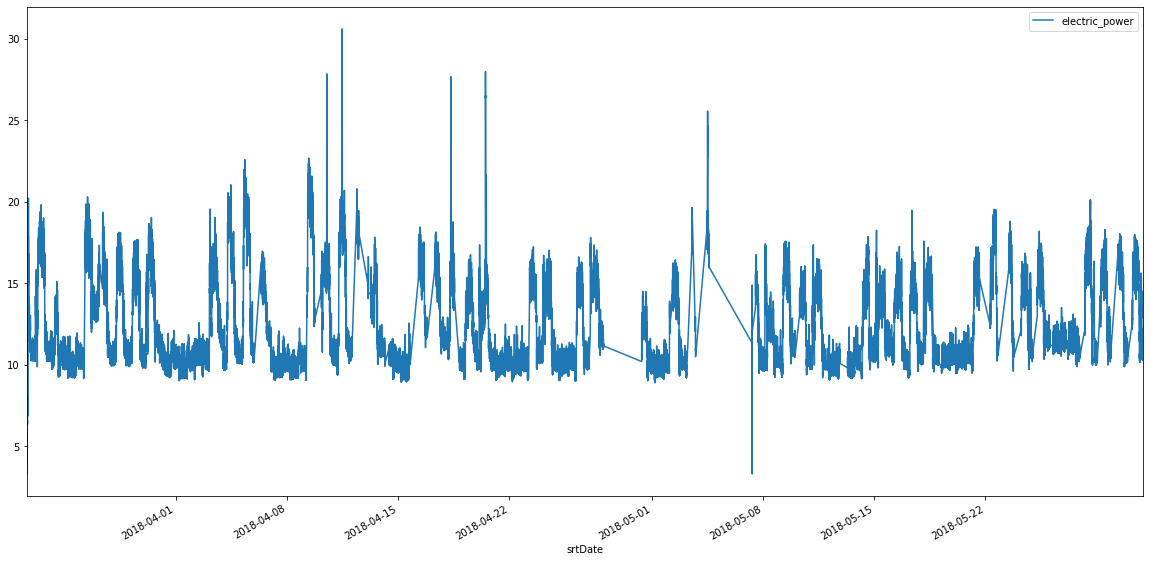

In [13]:
aggr_pe_df.plot(y=['electric_power'],figsize=(20,10))

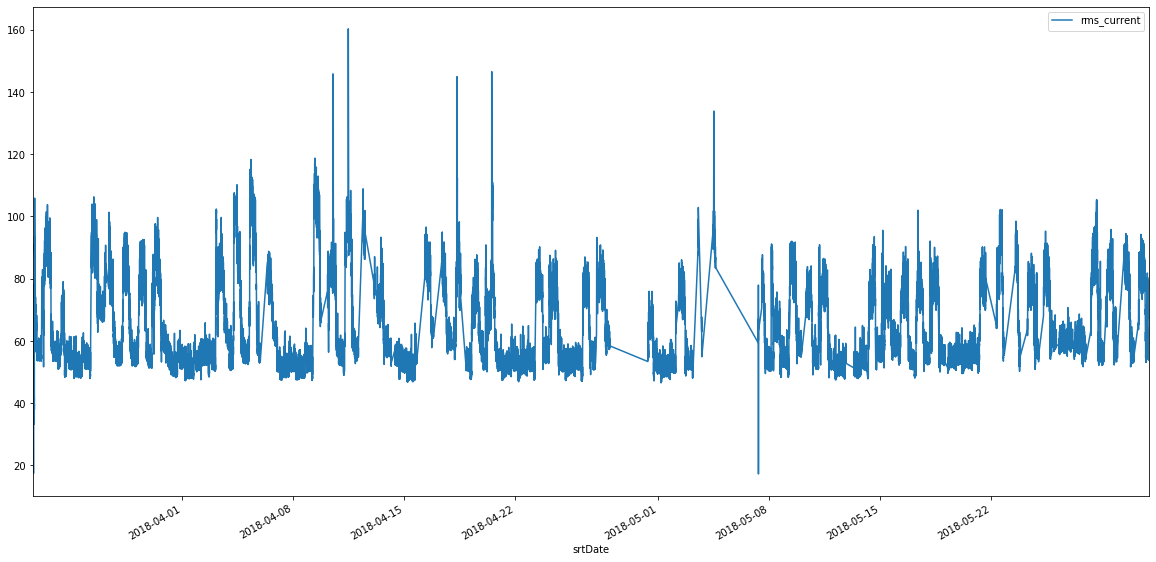

In [14]:
aggr_pe_df.plot(y=['rms_current'],figsize=(20,10))

Both plots have the same shape (even with peaks), so we can use correlation matrix to check if they are both correlated and how much

In [15]:
aggr_pe_df.corr()

,electric_power,rms_current
electric_power,1.0,1.0
rms_current,1.0,1.0


As we supposed they are both positively correlated by a factor of 1 (in fact to calculate power we can use current)

This means that when doing predictions we can just calculate one of them interchangeably

As we saw data is in nanoseconds but probably a forecasting is not needed at that level of detail, maybe an hourly prediction is more useful and should still account for seasonalities.

In [16]:
pe_df_hourly = aggr_pe_df.resample('H').mean()
pe_df_hourly.describe()

,electric_power,rms_current
count,1347.000000,1347.000000
mean,12.108927,63.440040
std,2.566757,13.447532
min,7.151129,37.465572
25%,10.073468,52.776040
50%,10.902296,57.118360
75%,14.267252,74.747749
max,23.894252,125.184688


/home/michele/miniconda3/envs/eda/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


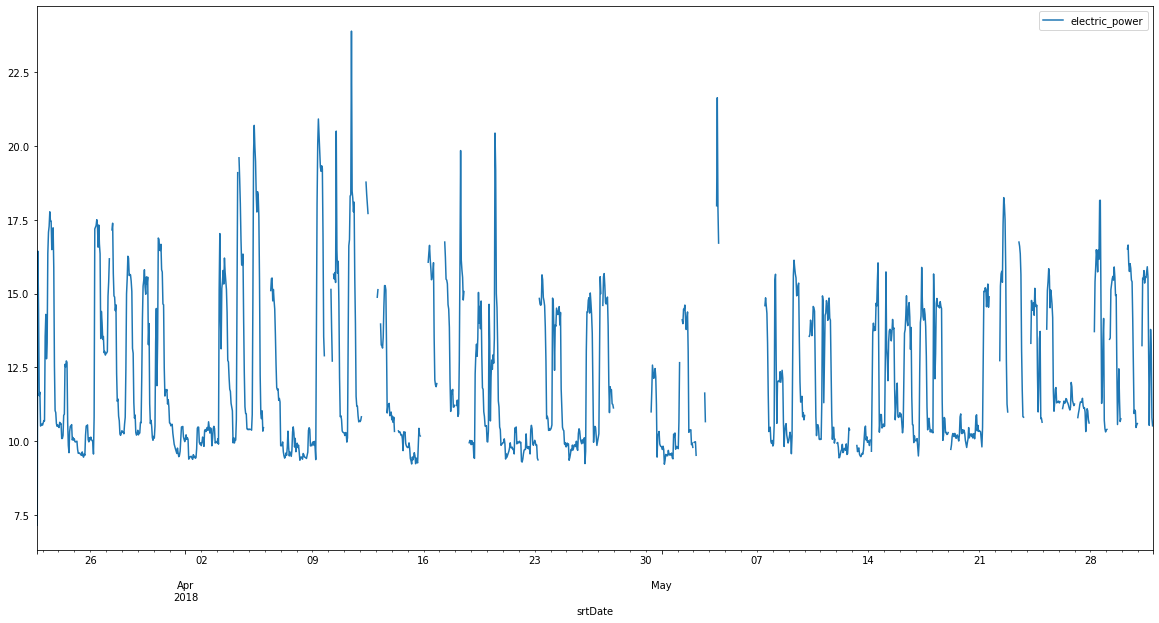

In [17]:
pe_df_hourly.plot(y=['electric_power'],figsize=(20,10))

In [18]:
nans = lambda df: df[df.isnull().any(axis=1)]
null_values = nans(pe_df_hourly)
print(f'Percentage of missing hours in total dataset {len(null_values) / len(pe_df_hourly)}')

Percentage of missing hours in total dataset 0.20201421800947866


We can make a function to print the missing data by different time frames to have an idea on how the sampling was intended or at least have an idea of what a good time frame for the data could be

In [19]:
def resample_stat(df, time_frames):
    for time_frame in time_frames:
        rdf = df.resample(time_frame).mean()
        print(f'For {time_frame} we have: \n\t dataset size: {len(rdf)}\n\t % missing values: {len(nans(rdf)) / len(rdf)} \n\t electric_power mean: {rdf.electric_power.mean()} \n\t electric_power std: {rdf.electric_power.std()}')

In [20]:
timeframes = ['s','10s','30s','Min','61s','62s','65s','70s','80s','90s','91s','2Min','122s','5Min','10Min','20Min','30Min','H', 'D']
resample_stat(aggr_pe_df, timeframes)

For s we have: 
	 dataset size: 6073870
	 % missing values: 0.9920288053580337 
	 electric_power mean: 12.09654915242641 
	 electric_power std: 2.635419259015618
For 10s we have: 
	 dataset size: 607388
	 % missing values: 0.9202881848176124 
	 electric_power mean: 12.09654915242641 
	 electric_power std: 2.635419259015618
For 30s we have: 
	 dataset size: 202464
	 % missing values: 0.7609550339813498 
	 electric_power mean: 12.096983964700877 
	 electric_power std: 2.635553919504617
For Min we have: 
	 dataset size: 101232
	 % missing values: 0.5230065591907698 
	 electric_power mean: 12.097198935570585 
	 electric_power std: 2.635225315592977
For 61s we have: 
	 dataset size: 99572
	 % missing values: 0.5152452496685815 
	 electric_power mean: 12.096953310047917 
	 electric_power std: 2.6356109284252396
For 62s we have: 
	 dataset size: 97967
	 % missing values: 0.5073034797431788 
	 electric_power mean: 12.097105363961308 
	 electric_power std: 2.635678519832891
For 65s we have: 
	 

We can see there is 5% total day missing data, ~20% missing hourly data and so on.
We want to create some feature engineered dataset(s) both for electric power prediction and for 'anomaly detection'
Taking the 1Min dataset would be cool as we would have a 50% splitted binary dataset but the data doesn't seem to be meant to be sampled every minute so we would end up with predictions that don't have a lot of meaning, also we can see the problem as checking the probability the sensor won't work for the next time_frame. A good compromise looks like to be using a 2Min time frame. But we can be more analytic and try to find the sampling period using the mean and sum and to check when they are almost (or totally equal)


In [21]:
def mean_sum_check(df, resamplings):
    for resample in resamplings:
        mean_df = df.resample(resample).mean()
        sum_df = df.resample(resample).sum()
        mean_df.fillna(0.0000, inplace=True)
        count = 0
        for i in range(len(mean_df)):
            m = mean_df.electric_power[i]
            s = sum_df.electric_power[i]
            if m != s:
                count = count + 1
        print(f'For {resample} is sum equal to mean? {sum_df.equals(mean_df)}. Different values:{count}. % difference: {count / len(mean_df)}')

In [22]:
#time_frames = ['15s','20s','30s','45s','60s','65s','90s','91s','92s','93s','95s','98s','100s','102s','2Min','5Min']

#mean_sum_check(aggr_pe_df, time_frames)

Yes this confirms that data is probably meant to be taken every ~90s as the error start to increase exponentially after that.
Let's create the 90s dataset and convert it to a supervised learning ready dataset

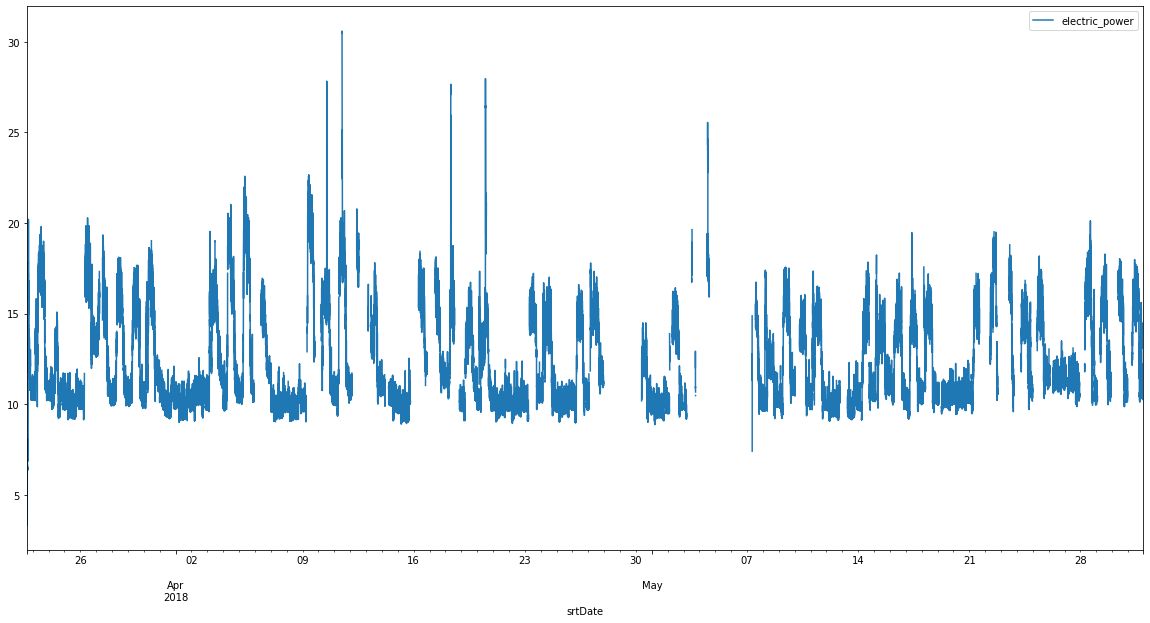

In [23]:
final_df = aggr_pe_df.resample('90s').mean()
final_df.plot(y=['electric_power'],figsize=(20,10))

We will add both cyclic and normal date parts to the dataset

In [24]:
final_df['srtDate'] = final_df.index
final_df_dt = add_datepart(final_df, field_name='srtDate',drop=False, time=True)
final_df_dt = add_cyclic_datepart(final_df_dt, field_name='srtDate', time=True)

In [25]:
# Let's add a column to represent if the current column is an anomaly or not
#final_df_dt['anomaly'] = np.where(np.isnan(final_df_dt['electric_power']), True, False)

In [26]:
#final_df_dt.head(20)

Now let's backfill (with a limit of 3 consecutive values) the data and check how many values are still missing

In [27]:
before = len(nans(final_df_dt))

final_df_dt_filled = final_df_dt.fillna(method='bfill')

after = len(nans( final_df_dt_filled ))

print(f"Null values before and after {before} -> {after}")

#final_df_dt_filled = final_df_dt_filled.resample('5Min').mean()

Null values before and after 19305 -> 0


In [28]:
#final_df_dt_filled.plot(y=['electric_power'],figsize=(20,10))

In [29]:
NUM_LAGS = 40*24 # Increasing this makes your model more complex but also increases the opportunity to catch more seasonalities
LAG_START = 40*24*2 # The more lag variables the bigger the validation set can be as we use t-X as lag
LAG_END = LAG_START + NUM_LAGS # An equivalent number of rows will be discarded from the top of our train set as they will have NaN values

final_df_dt_filled['electric_power'] = np.log(final_df_dt_filled['electric_power'])

for i in range(LAG_START,LAG_END):
    lag_feature = 'electric_power_t-' + str(i)
    final_df_dt_filled[lag_feature] = final_df_dt_filled['electric_power'].shift(i)
    
final_df_dt_filled['delta_y'] = final_df_dt_filled['electric_power'] - final_df_dt_filled['electric_power_t-'+str(LAG_START)]

In [30]:
final_df_dt_filled = final_df_dt_filled.tail(len(final_df_dt_filled) - LAG_END)
final_df_dt_filled.head()

,electric_power,rms_current,srtYear,srtMonth,srtWeek,srtDay,srtDayofweek,srtDayofyear,srtIs_month_end,srtIs_month_start,...,electric_power_t-2871,electric_power_t-2872,electric_power_t-2873,electric_power_t-2874,electric_power_t-2875,electric_power_t-2876,electric_power_t-2877,electric_power_t-2878,electric_power_t-2879,delta_y
srtDate,,,,,,,,,,,,,,,,,,,,,
2018-03-25 15:16:30+00:00,2.228575,48.653689,2018,3,12,25,6,84,False,False,...,2.566523,2.641289,2.703237,2.542991,2.463642,2.602248,2.607698,2.617423,2.595265,-0.575503
2018-03-25 15:18:00+00:00,2.225440,48.501366,2018,3,12,25,6,84,False,False,...,2.568855,2.566523,2.641289,2.703237,2.542991,2.463642,2.602248,2.607698,2.617423,-0.606813
2018-03-25 15:19:30+00:00,2.233238,48.881057,2018,3,12,25,6,84,False,False,...,2.593038,2.568855,2.566523,2.641289,2.703237,2.542991,2.463642,2.602248,2.607698,-0.644046
2018-03-25 15:21:00+00:00,2.225503,48.504413,2018,3,12,25,6,84,False,False,...,2.662842,2.593038,2.568855,2.566523,2.641289,2.703237,2.542991,2.463642,2.602248,-0.570026
2018-03-25 15:22:30+00:00,2.221663,48.318541,2018,3,12,25,6,84,False,False,...,2.571516,2.662842,2.593038,2.568855,2.566523,2.641289,2.703237,2.542991,2.463642,-0.576345


The dataset is complete let's take a final brief look and save as a file

In [31]:
final_df_dt_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64609 entries, 2018-03-25 15:16:30+00:00 to 2018-05-31 22:28:30+00:00
Freq: 90S
Columns: 995 entries, electric_power to delta_y
dtypes: bool(6), float64(979), int64(10)
memory usage: 488.4 MB


In [32]:
import os

try:
    os.mkdir('../data/engineered/')
except:
    pass

In [33]:
#final_df_dt_filled.to_csv('../data/engineered/powerelectricity.csv', index=False)
#final_df_dt_filled

Let's make a train test split

In [34]:
train = final_df_dt_filled.iloc[0:-(LAG_START+1)]
test = final_df_dt_filled.iloc[-(LAG_START+1):-1]

And finally save to train and test files

In [35]:
train.to_csv('../data/engineered/powerelectricity_train.csv', index=False)
test.to_csv('../data/engineered/powerelectricity_test.csv', index=False)